<div style='background-image: url("./images/header_l4.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">ObsPy Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Handling Waveform Data</div>
        </div>
    </div>
</div>

---
## Create velocity model
* %run taup_create.py (the reference velocity models put in vel_mod)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

iasp91Df = pd.read_table("./vel_mod/iasp91.tvel", sep='\s+', names=["dep", "vp", "vs", "density"],
                        skiprows=range(2))
print iasp91Df

         dep       vp      vs  density
0       0.00   5.8000  3.3600   2.7200
1      20.00   5.8000  3.3600   2.7200
2      20.00   6.5000  3.7500   2.9200
3      35.00   6.5000  3.7500   2.9200
4      35.00   8.0400  4.4700   3.3198
5      77.50   8.0450  4.4850   3.3455
6     120.00   8.0500  4.5000   3.3713
7     165.00   8.1750  4.5090   3.3985
8     210.00   8.3000  4.5180   3.4258
9     210.00   8.3000  4.5220   3.4258
10    260.00   8.4825  4.6090   3.4561
11    310.00   8.6650  4.6960   3.4864
12    360.00   8.8475  4.7830   3.5167
13    410.00   9.0300  4.8700   3.5470
14    410.00   9.3600  5.0700   3.7557
15    460.00   9.5280  5.1760   3.8175
16    510.00   9.6960  5.2820   3.8793
17    560.00   9.8640  5.3880   3.9410
18    610.00  10.0320  5.4940   4.0028
19    660.00  10.2000  5.6000   4.0646
20    660.00  10.7900  5.9500   4.3714
21    710.00  10.9229  6.0797   4.4010
22    760.00  11.0558  6.2095   4.4305
23    809.50  11.1440  6.2474   4.4596
24    859.00  11.2300  6.

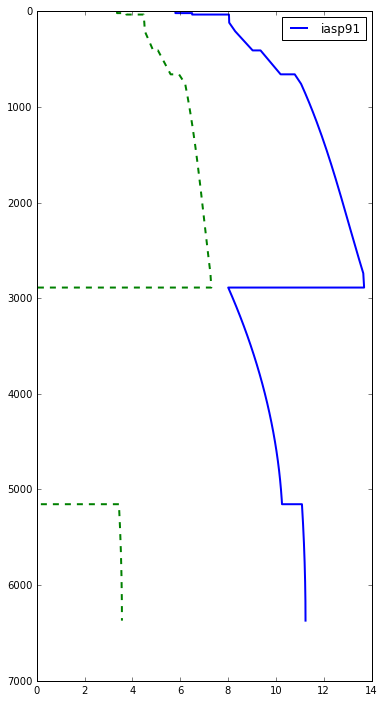

In [2]:
plt.figure(figsize=(6, 12))
plt.plot(iasp91Df['vp'], iasp91Df['dep'], color="blue", linewidth=2, label="iasp91")
plt.plot(iasp91Df['vs'], iasp91Df['dep'], color="green", linewidth=2, ls='--', label="")
plt.legend(loc="best")
plt.gca().invert_yaxis()
plt.show()

In [3]:
wu2007Df = pd.read_table("./vel_mod/wu2007.tvel", sep='\s+', names=["dep", "vp", "vs", "density"],
                        skiprows=range(2))

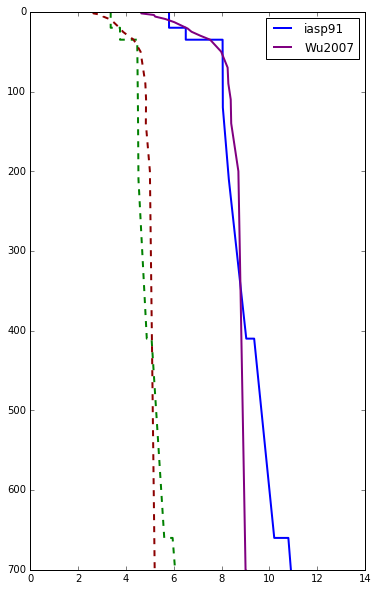

In [4]:
plt.figure(figsize=(6, 10))
plt.plot(iasp91Df['vp'], iasp91Df['dep'], color="blue", linewidth=2, label="iasp91")
plt.plot(iasp91Df['vs'], iasp91Df['dep'], color="green", linewidth=2, ls='--', label="")
plt.plot(wu2007Df['vp'], wu2007Df['dep'], color="purple", linewidth=2, label="Wu2007")
plt.plot(wu2007Df['vs'], wu2007Df['dep'], color="darkred", linewidth=2, ls='--', label="")
plt.legend(loc="best")
plt.ylim(0, 700)
plt.gca().invert_yaxis()
plt.show()

In [5]:
%run taup_create.py

Building obspy.taup model for 'E:\school\Noise\Internship_course\lesson_4\vel_mod\iasp91.tvel' ...
Building obspy.taup model for 'E:\school\Noise\Internship_course\lesson_4\vel_mod\Wu2007.tvel' ...


---
## Seismic phase
### Epicentral distance, azimuth, backazimuth
* gps2dist_azimuth(lat1, lon1, lat2, lon2, a=6378137.0, f=0.0033528106647474805)

<img src="./images/earth.png" alt="Drawing" style="width: 320px;"/>

\begin{equation*}
𝚫 = 𝐜𝐨𝐬^{−𝟏}[𝐜𝐨𝐬(𝟗𝟎°−𝜽_{𝒔ta})𝐜𝐨𝐬(𝟗𝟎°−𝜽_{epi})+𝐬𝐢𝐧(𝟗𝟎°−𝜽_{sta})𝐬𝐢𝐧(𝟗𝟎°−𝜽_{epi})𝐜𝐨𝐬(𝝓_{sta}−𝝓_{epi})]
\end{equation*}

\begin{equation*}
𝐭𝐚𝐧𝑨𝒁=\frac{𝐜𝐨𝐬𝜽_{sta}𝐜𝐨𝐬𝜽_{epi}𝐬𝐢𝐧(𝝓_{sta}-𝝓_{epi})}{𝐬𝐢𝐧𝜽_{sta}−𝐜𝐨𝐬𝚫𝐬𝐢𝐧𝜽_{epi}}
\end{equation*}

In [6]:
import obspy
from obspy.geodetics import gps2dist_azimuth

st = obspy.read('./data/Q33A.BHZ.TA.01_2011.070.sac')
tr = st[0]
stla, stlo = tr.stats.sac.stla, tr.stats.sac.stlo
eq_lat, eq_lon, eq_dep = 38.2963, 142.498, 19.7
distance, az, baz = gps2dist_azimuth(stla, stlo, eq_lat, eq_lon)
print distance, az, baz

9467775.94175 316.826963598 42.6533668152


### Phase travel time & Ray path
* model.get_travel_times_geo(eq_dep, eq_lat, eq_lon, stla, stlo)

In [7]:
from obspy.taup import TauPyModel
model = TauPyModel(model="iasp91")
arrivals = model.get_travel_times_geo(eq_dep, eq_lat, eq_lon, stla, stlo)
print arrivals

31 arrivals
	P phase arrival at 753.717 seconds
	PcP phase arrival at 756.793 seconds
	pP phase arrival at 760.272 seconds
	sP phase arrival at 762.790 seconds
	PP phase arrival at 950.185 seconds
	PKiKP phase arrival at 1065.682 seconds
	pPKiKP phase arrival at 1072.451 seconds
	sPKiKP phase arrival at 1074.922 seconds
	SKiKP phase arrival at 1278.695 seconds
	SKS phase arrival at 1376.147 seconds
	S phase arrival at 1381.930 seconds
	SKKS phase arrival at 1382.567 seconds
	pSKS phase arrival at 1385.098 seconds
	sSKS phase arrival at 1387.650 seconds
	pS phase arrival at 1390.433 seconds
	ScS phase arrival at 1391.966 seconds
	sS phase arrival at 1393.119 seconds
	SP phase arrival at 1435.609 seconds
	PS phase arrival at 1438.437 seconds
	SS phase arrival at 1715.747 seconds
	PKIKKIKP phase arrival at 1832.310 seconds
	PKKP phase arrival at 1840.942 seconds
	SKIKKIKP phase arrival at 2045.312 seconds
	PKIKKIKS phase arrival at 2047.784 seconds
	SKKP phase arrival at 2057.645 seconds


* tau_plot(st, model_name, eq_lon, eq_lat, eq_dep, phase_list=None, show=True, info=False)

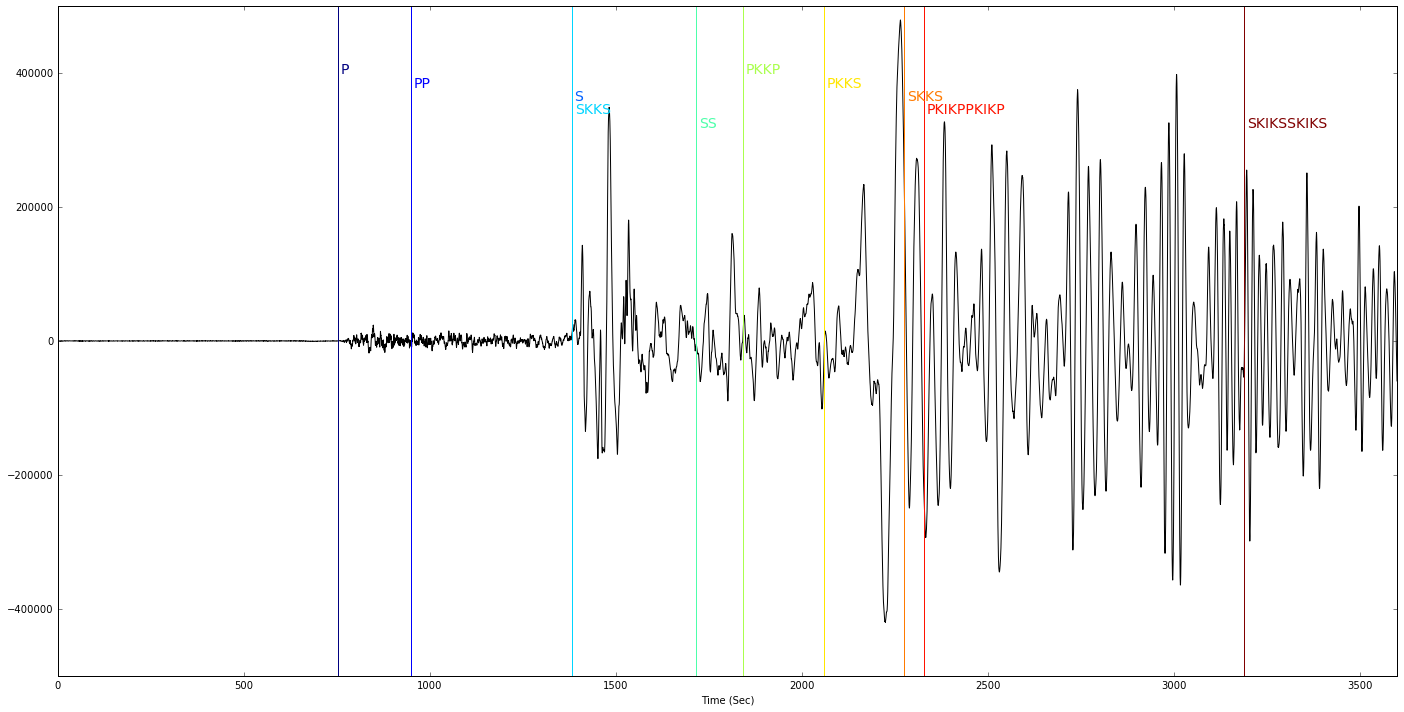

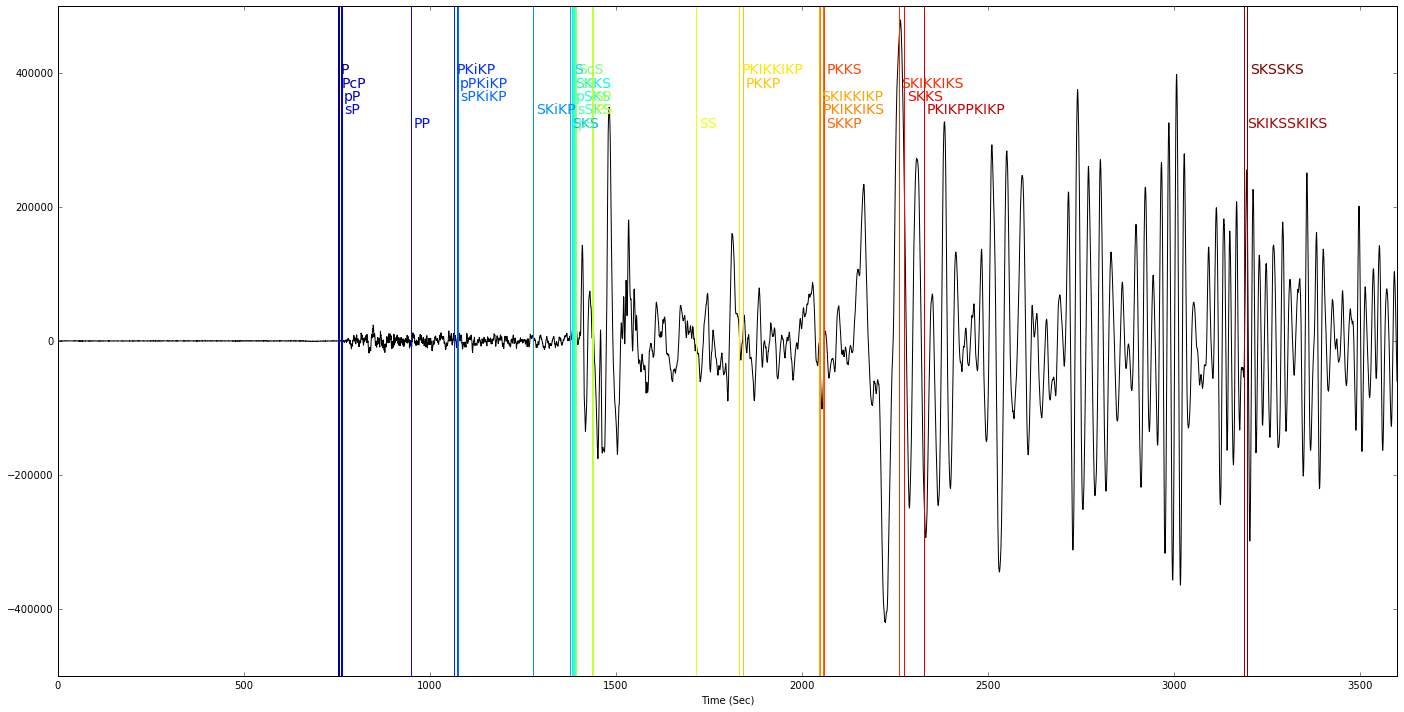

In [8]:
import taup_script
st = obspy.read('./data/Q33A.BHE.TA.01_2011.070.sac')
eq_time = obspy.UTCDateTime("2011-03-11T05:46:23.000000Z")
duration = 3600.0
ot = st.slice(eq_time, eq_time + duration)
taup_script.tau_plot(ot, 'iasp91', eq_lon, eq_lat, eq_dep)

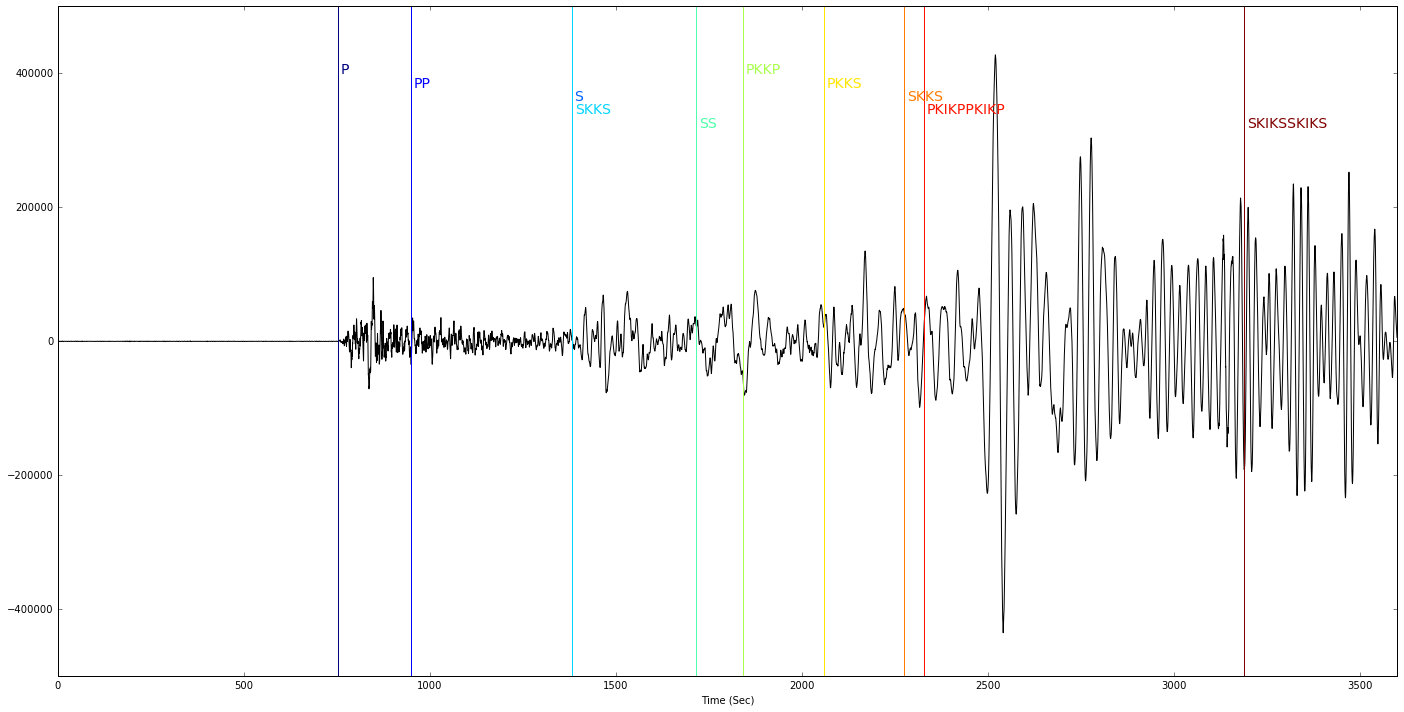

In [9]:
st = obspy.read('./data/Q33A.BHZ.TA.01_2011.070.sac')
ot = st.slice(eq_time, eq_time + duration)
taup_script.tau_plot(ot, 'iasp91', eq_lon, eq_lat, eq_dep,
                    phase_list=["P", "PP", "S", "SS", "PKKP", "SKKS", "PKKS",
                                "PKIKPPKIKP", "SKIKSSKIKS"])

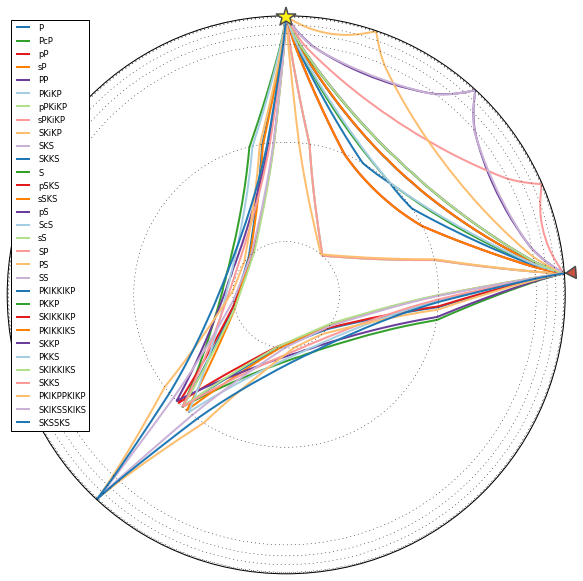

In [10]:
degree = distance / 1000 / 110.633
arrivals = model.get_ray_paths(
    source_depth_in_km=eq_dep,
    distance_in_degree=degree)
arrivals.plot()

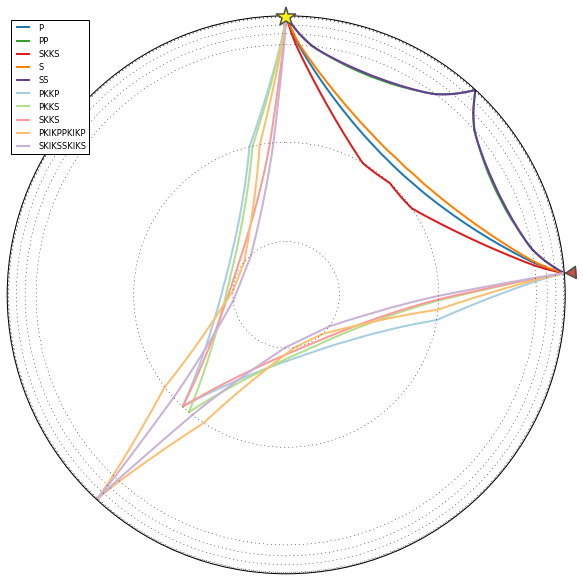

In [11]:
arrivals = model.get_ray_paths(
    source_depth_in_km=eq_dep,
    distance_in_degree=degree,
    phase_list=["P", "PP", "S", "SS", "PKKP", "SKKS", "PKKS", "PKIKPPKIKP", "SKIKSSKIKS"])
arrivals.plot()

## 3 Examples in Taiwan
We choose 3 events with different epicentral distance.

<img src="./images/3example_event.png" alt="Drawing" style="width: 1080px;570px"/>

### World catalog
<img src="./images/anss.png" alt="Drawing" style="width: 1002px;178px"/>

#### You can download from:
http://www.quake.geo.berkeley.edu/anss/catalog-search.html

### Transverse & Radial (https://service.iris.edu/irisws/rotation/docs/1/help/)
* Stream.rotate(method, back_azimuth=None, inclination=None)
* Two dimensional rotation matrix
  - **N**, and **E** represent data from horizontal orientations
  - **R**, and **T** represent Radial and Transverse components
  - 𝜽 is the azimuth
<img src="./images/iris_rt.png" alt="Drawing" style="width: 450px;450px"/>

\begin{equation*}
\mathbf{M}_{2D} = \begin{vmatrix}
𝐜𝐨𝐬𝜽 & 𝐬𝐢𝐧𝜽 \\
-𝐬𝐢𝐧𝜽 & 𝐜𝐨𝐬𝜽
\end{vmatrix}
\end{equation*}

\begin{equation*}
\begin{vmatrix}
\mathbf{R} \\
\mathbf{T}
\end{vmatrix}
= \mathbf{M}_{2D} \begin{vmatrix}
\mathbf{N} \\
\mathbf{E}
\end{vmatrix}
\end{equation*}

* Three dimensional rotation matrix
  - 𝝓 is the angle of incidence, measured from vertical
  - **Z**, **E**, and **T** represent 3 seismograms with original orientations
  - **L**, **Q**, and **T** represent 3 seismograms that are output as below
    - **L** - Align in direction of P wave propagation
    - **Q** - Align in direction of the SV phase movement
    - **T** - Align in direction of the SH phase movement
<img src="images/iris_lqt.png" alt="Drawing" style="width: 450px;450px"/>

\begin{equation*}
\mathbf{M}_{3D} = \begin{vmatrix}
𝐜𝐨𝐬𝝓 & -𝐬𝐢𝐧𝝓𝐬𝐢𝐧b𝜽 & -𝐬𝐢𝐧𝝓𝐜𝐨𝐬b𝜽 \\
𝐬𝐢𝐧𝝓 & 𝐜𝐨𝐬𝝓𝐬𝐢𝐧b𝜽 & 𝐜𝐨𝐬𝝓𝐜𝐨𝐬b𝜽 \\
\mathbf{0} & -𝐜𝐨𝐬b𝜽 & 𝐜𝐨𝐬b𝜽
\end{vmatrix}
\end{equation*}

\begin{equation*}
\begin{vmatrix}
\mathbf{L} \\
\mathbf{Q} \\
\mathbf{T}
\end{vmatrix}
= \mathbf{M}_{3D} \begin{vmatrix}
\mathbf{Z} \\
\mathbf{E} \\
\mathbf{N}
\end{vmatrix}
\end{equation*}

18499.6629264 129.553788073


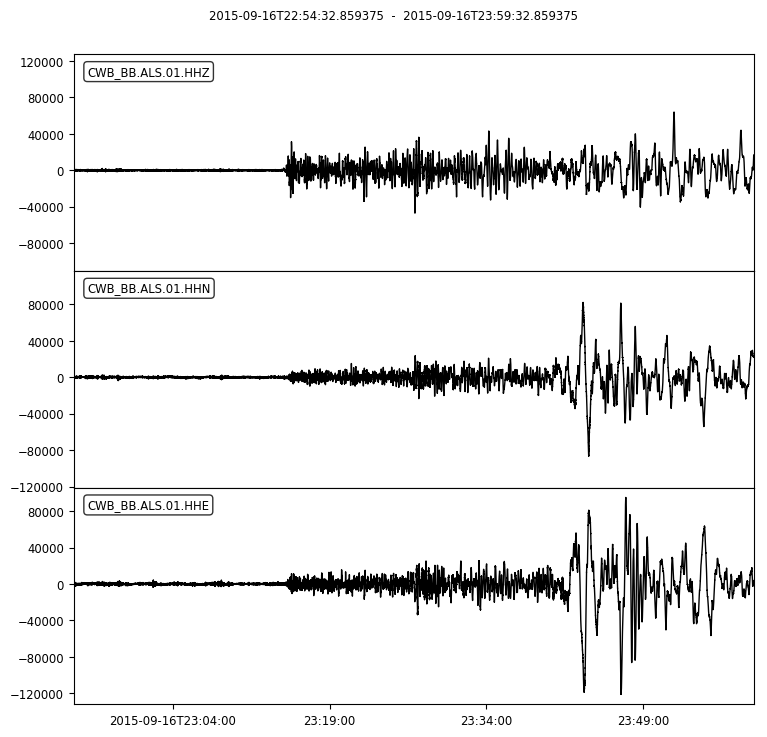

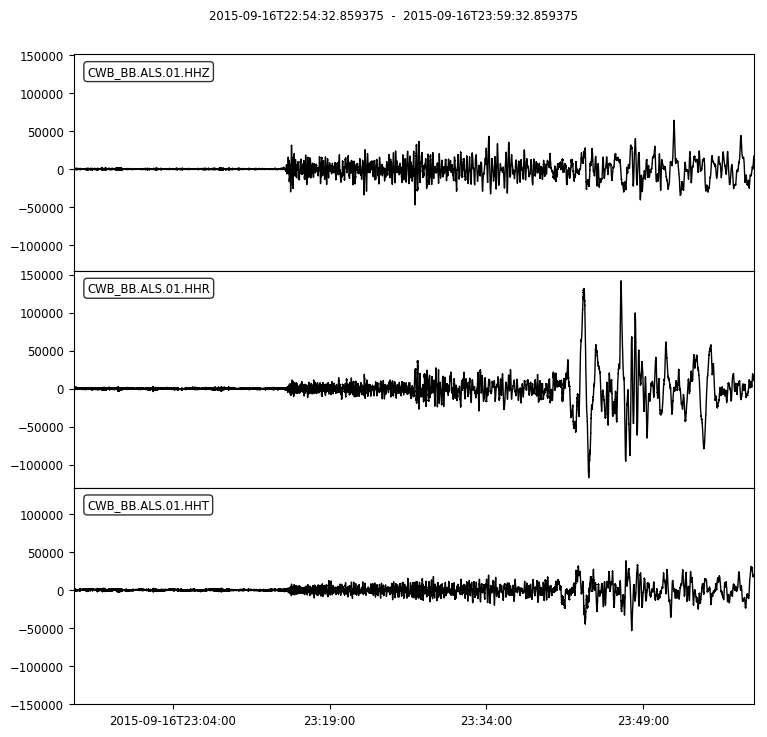

In [9]:
st = obspy.read("./data/slice_ALS_HH?_2015_259.sac")
tr = st[0]
stla, stlo = tr.stats.sac.stla, tr.stats.sac.stlo
eq_lon, eq_lat, eq_dep = -71.6744, -31.5729, 22.44 
distance, az, baz = gps2dist_azimuth(eq_lat, eq_lon, stla, stlo)
st[0].stats.starttime = st[1].stats.starttime
rt = st.copy().rotate("NE->RT", back_azimuth=baz)
print distance / 1000.0, baz
st.plot()
rt.plot()

### Event: 2011-03-11 

2631.0380408 237.737016154


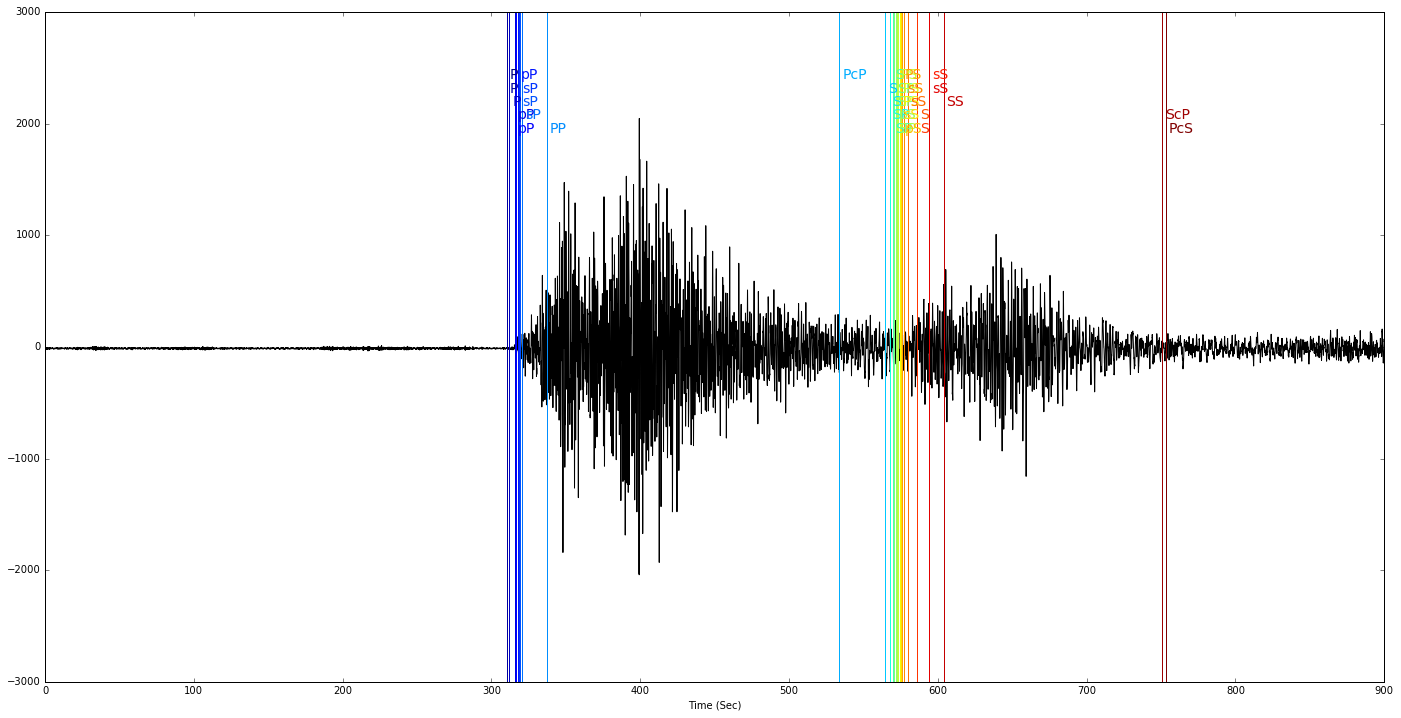

In [16]:
st = obspy.read("./data/slice_ALS_HHE_2011_070.sac")
tr = st[0]
stla, stlo = tr.stats.sac.stla, tr.stats.sac.stlo
eq_lon, eq_lat, eq_dep = 142.498, 38.2963, 19.7
distance, az, baz = gps2dist_azimuth(stla, stlo, eq_lat, eq_lon)
print distance / 1000.0, baz
taup_script.tau_plot(st, 'iasp91', eq_lon, eq_lat, eq_dep, save=False)

23.7030454126 46.4072202224


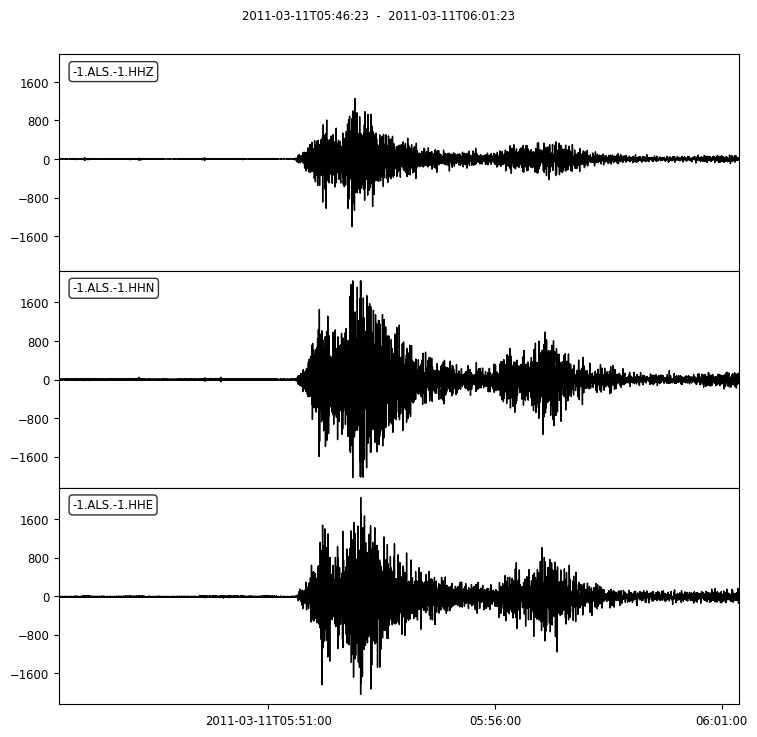

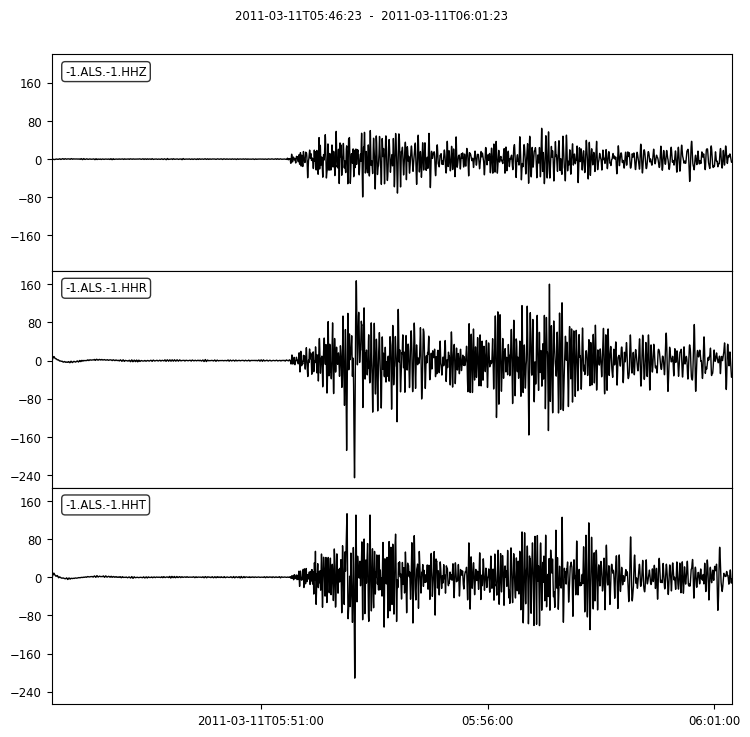

In [10]:
import obspy
from obspy.geodetics import gps2dist_azimuth
st = obspy.read("./data/slice_ALS_HH?_2011_070.sac")
tr = st[0]
stla, stlo = tr.stats.sac.stla, tr.stats.sac.stlo
eq_lon, eq_lat, eq_dep = 142.498, 38.2963, 19.7
t = obspy.UTCDateTime("2011-03-11T05:46:23.000000Z")
distance, az, baz = gps2dist_azimuth(eq_lat, eq_lon, stla, stlo)
st[0].stats.starttime = st[1].stats.starttime
rt = st.copy().rotate("NE->RT", back_azimuth=baz)
# rt = rt.slice(t+300, t+600)
rt = rt.filter("bandpass", freqmin=0.01, freqmax=0.3)
print distance / 1000.0 / 111.0, baz
st.plot()
rt.plot()

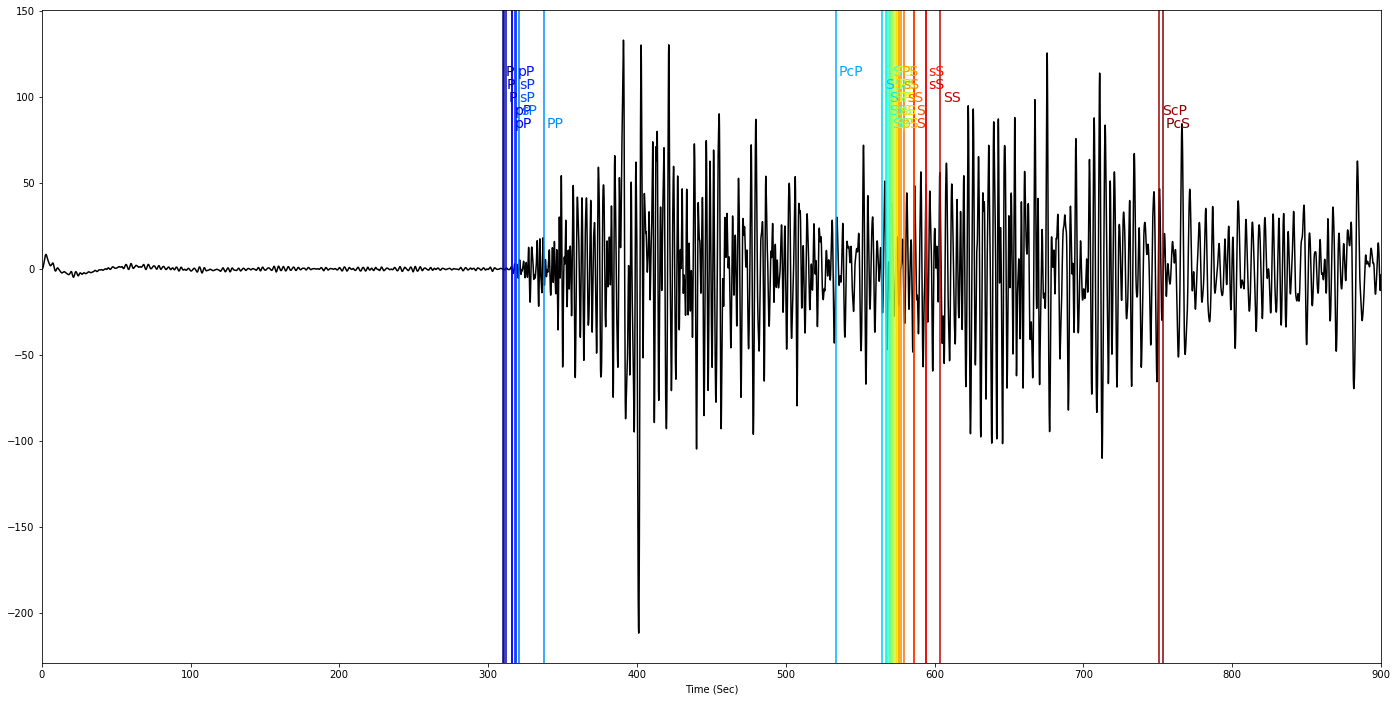

In [11]:
import taup_script
taup_script.tau_plot(rt, 'iasp91', eq_lon, eq_lat, eq_dep)

### Event: 2015-09-16 

166.663629967 236.05319722


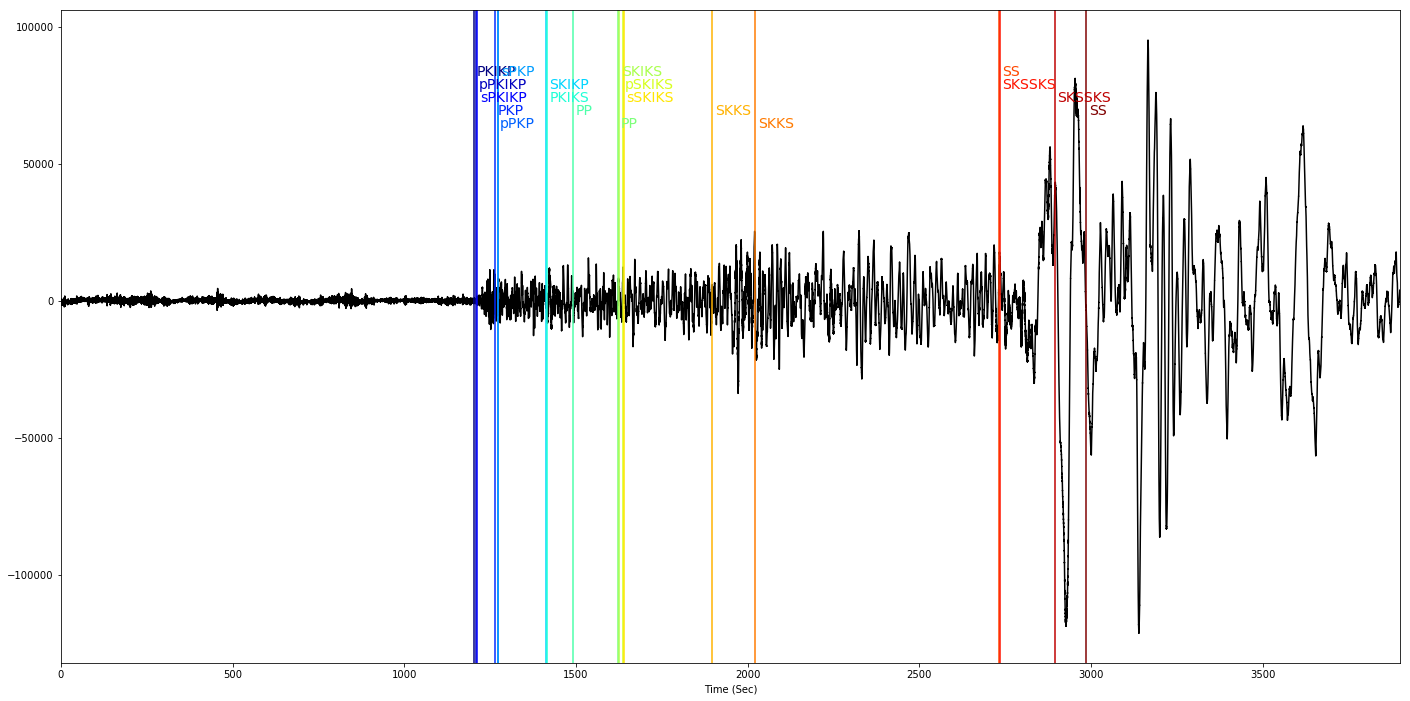

In [12]:
eq_lon, eq_lat, eq_dep = -71.6744, -31.5729, 22.44
st = obspy.read("./data/slice_ALS_HHE_2015_259.sac")
tr = st[0]
stla, stlo = tr.stats.sac.stla, tr.stats.sac.stlo
distance, az, baz = gps2dist_azimuth(stla, stlo, eq_lat, eq_lon)
print distance / 1000.0/ 111, baz
taup_script.tau_plot(st, 'iasp91', eq_lon, eq_lat, eq_dep, save=False)

### Event: 2016-02-05 

69.891954786 23.5489421411


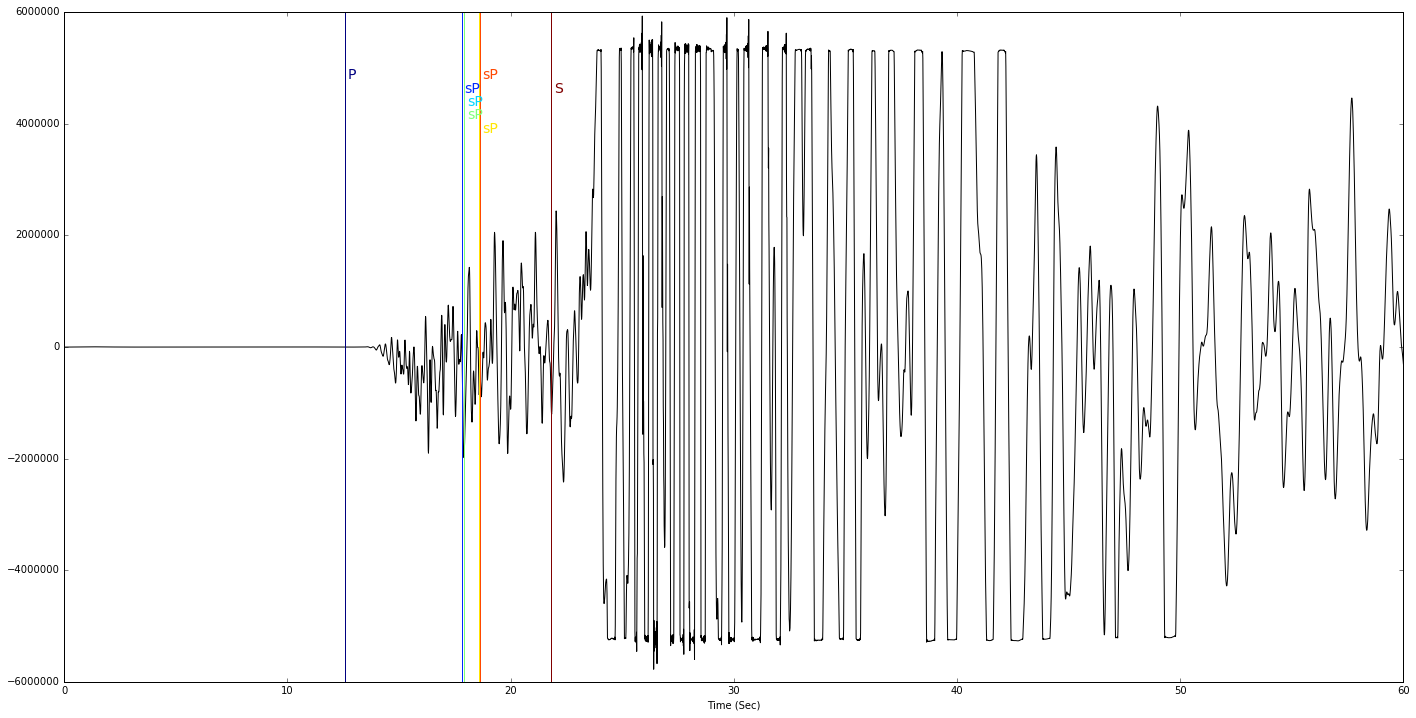

In [18]:
eq_lon, eq_lat, eq_dep = 120.54, 22.93, 14.6
st = obspy.read("./data/slice_ALS_HHE_2016_036.sac")
tr = st[0]
stla, stlo = tr.stats.sac.stla, tr.stats.sac.stlo
distance, az, baz = gps2dist_azimuth(stla, stlo, eq_lat, eq_lon)
print distance / 1000.0, baz
taup_script.tau_plot(st, 'Wu2007', eq_lon, eq_lat, eq_dep, save=False)

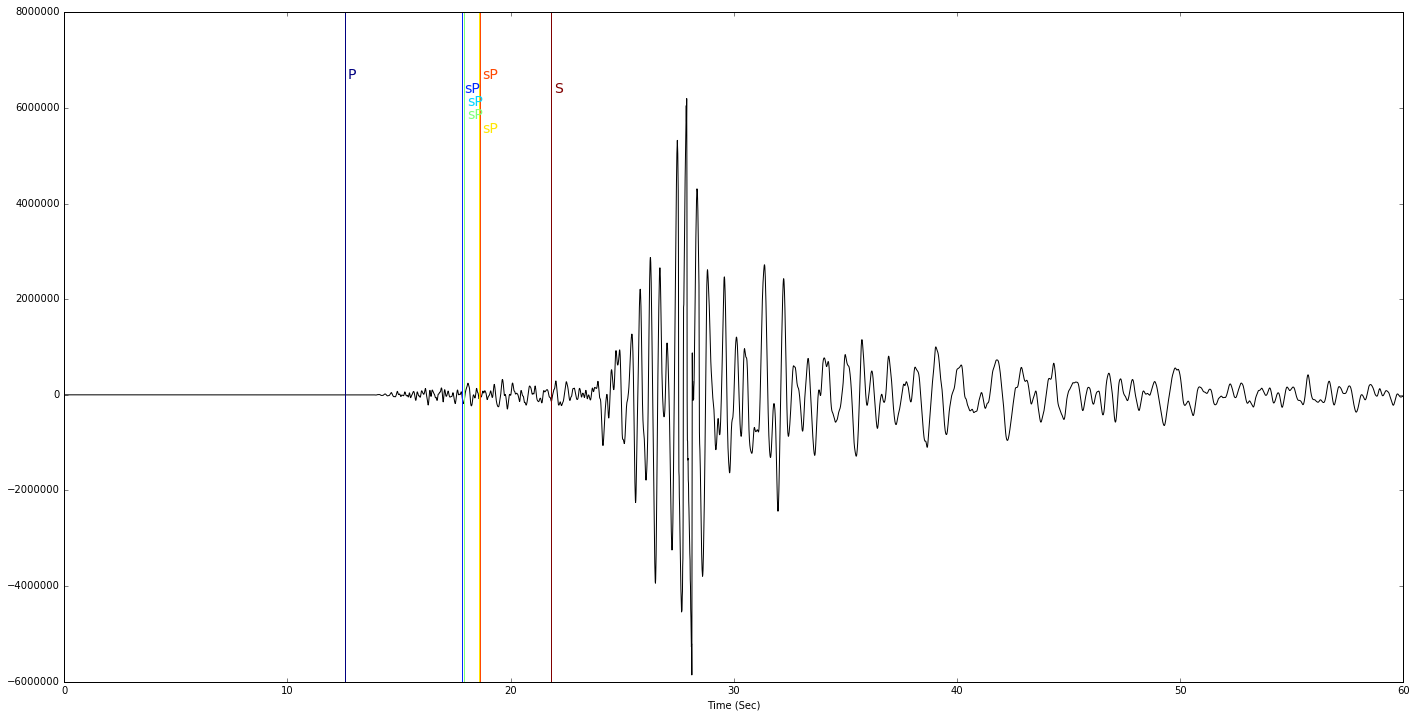

In [19]:
eq_lon, eq_lat, eq_dep = 120.54, 22.93, 14.6
st = obspy.read("./data/slice_ALS_HSE_2016_036.sac")
taup_script.tau_plot(st, 'Wu2007', eq_lon, eq_lat, eq_dep, save=False)

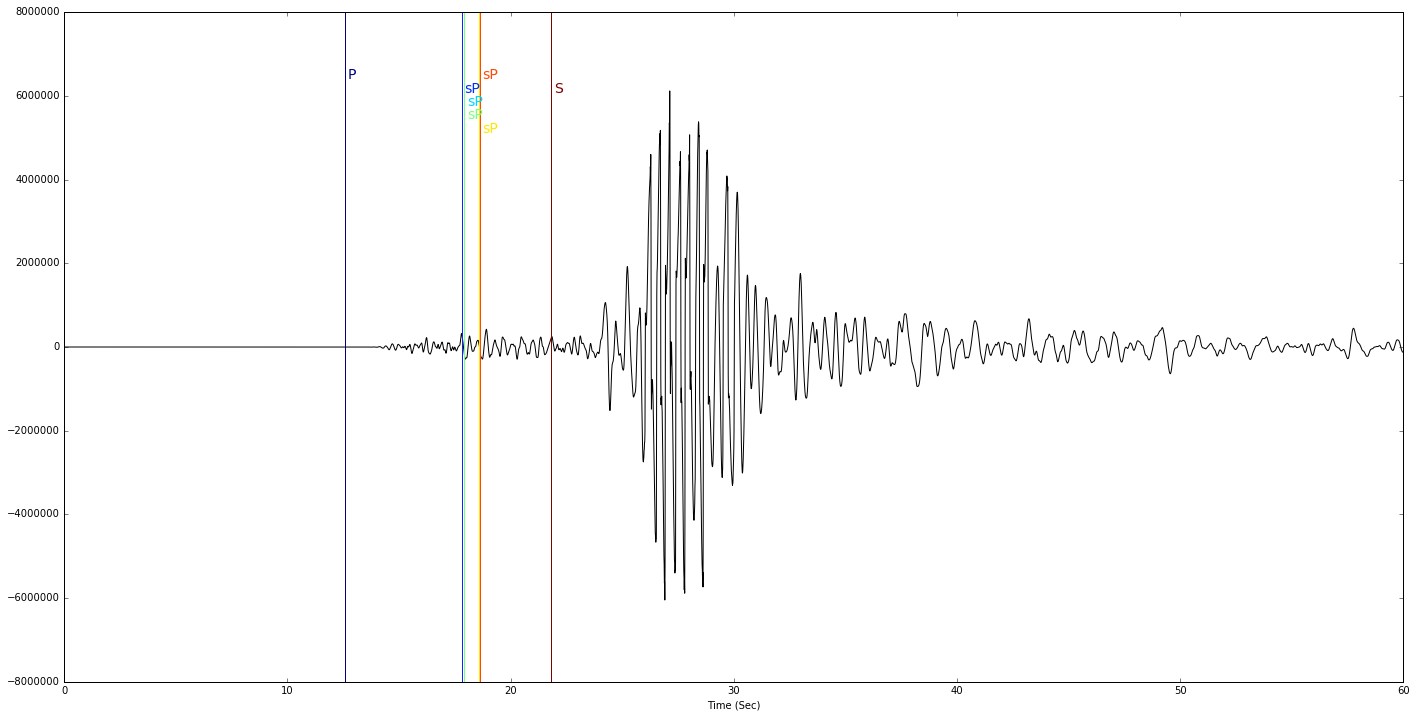

In [20]:
st = obspy.read("./data/slice_ALS_HSN_2016_036.sac")
taup_script.tau_plot(st, 'Wu2007', eq_lon, eq_lat, eq_dep, save=False)

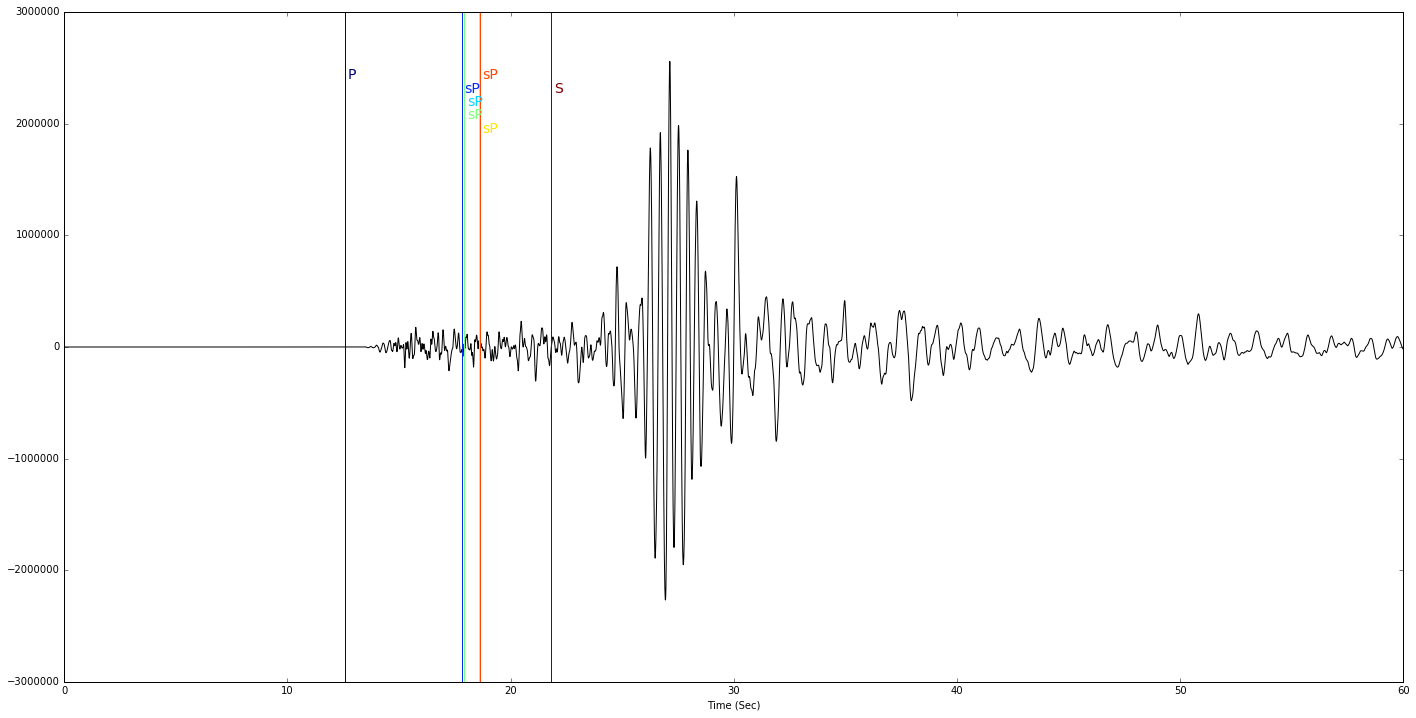

In [21]:
st = obspy.read("./data/slice_ALS_HSZ_2016_036.sac")
taup_script.tau_plot(st, 'Wu2007', eq_lon, eq_lat, eq_dep, save=False)

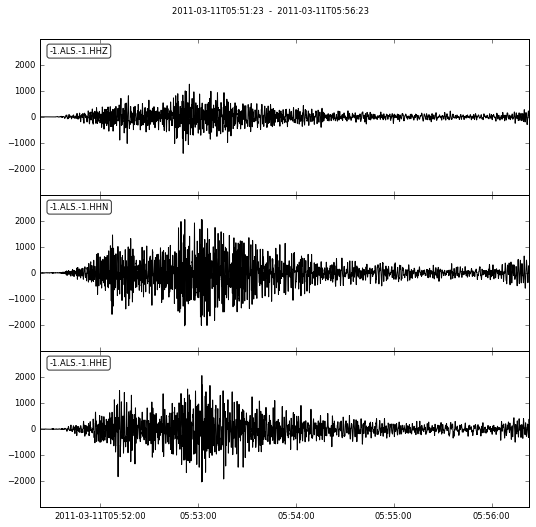

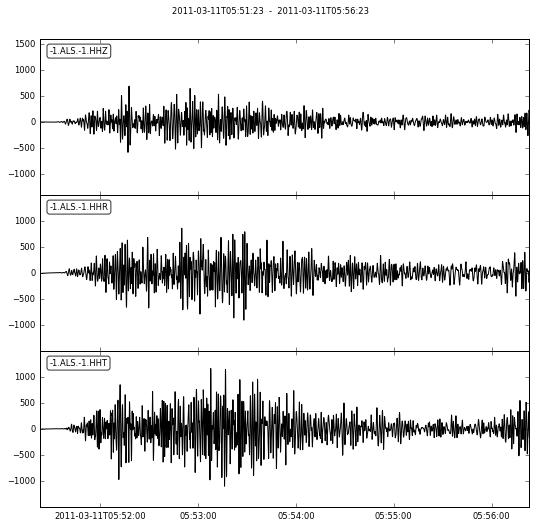

In [35]:
st = obspy.read("./data/slice_ALS_HH?_2011_070.sac")
tr = st[0]
stla, stlo = tr.stats.sac.stla, tr.stats.sac.stlo
eq_lon, eq_lat, eq_dep = 142.498, 38.2963, 19.7
distance, az, baz = gps2dist_azimuth(stla, stlo, eq_lat, eq_lon)
st[0].stats.starttime = st[1].stats.starttime
t = obspy.UTCDateTime("2011-03-11T05:46:23.000000Z")
st = st.slice(t+300, t+600)
st.plot()
rt = st.copy().rotate("NE->RT", back_azimuth=baz)
rt = rt.slice(t+300, t+600)
rt = rt.filter("bandpass", freqmin=0.01, freqmax=1.0)
rt.plot()

## Homework

1. Select three events from your two months data (2016-04-01 ~ 2016-05-31) with different epicentral distance (dist. < 100km, 100km <= dist. < 3000km, dist. >= 3000km) and show the locations with your stations in the map.
2. Plot the N, E, Z seismogram of each event and rotate them to R, T, Z component. Use Taup to identify the phases recorded by these events.